# Assignment 5

# Weeks 8 & 9 - Pandas
In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below.  The preferred method for this analysis is in a .ipynb file.

## Some data examples:
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

## Resources:

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html




______________
# Data Exploration
Import your dataset into your environment and explore your data.  You should include any summary statistics, means, medians, quartiles, or any other relevant information about the dataset.  



In [700]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import unittest
import requests
import json
import seaborn as sb
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import plotly.express as px


In [741]:
#Reading in confirmed cases only
df = pd.read_csv("https://raw.githubusercontent.com/ssufian/DAT-602/master/time_series_2019-ncov-Confirmed.csv?token=AMUD773Q324WQK473FQG5PC6OZVRA",index_col=False, na_filter= False)
df.head(8)
# shape from wide to long with melt function in pandas

dfconfirmed= pd.melt(df,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='value')
dfconfirmed.head(10) #peeking

#summary statistics of dataset

df.loc[:,['3/20/2020']].describe()


,3/20/2020
count,477.000000
mean,570.578616
std,4163.404218
min,0.000000
25%,0.000000
50%,4.000000
75%,96.000000
max,67800.000000


In [738]:
#Total number of confirmed cases as of 3/20/2020
df.loc[:,['3/20/2020']].sum()

3/20/2020    272166
dtype: int64

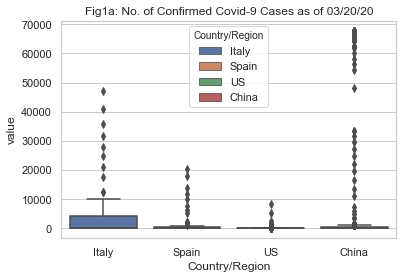

In [742]:
#Example1: Side-by-Side Boxplot comparision of confirmed cases in US,Italy, Spain & China
t=dfconfirmed.loc[(dfconfirmed['Country/Region'] == 'US') | (dfconfirmed['Country/Region'] == 'Italy') | (dfconfirmed['Country/Region'] == 'China') | (dfconfirmed['Country/Region'] == 'Spain')]
t
sns.set_style("whitegrid") 
sns.boxplot(x = 'Country/Region', y = 'value', hue='Country/Region' ,dodge=False,data = t).set_title('Fig1a: No. of Confirmed Covid-9 Cases as of 03/20/20') ;


In [743]:
#Reading in actual Death cases only
df1 = pd.read_csv("https://raw.githubusercontent.com/ssufian/DAT-602/master/time_series_2019-ncov-Deaths.csv?token=AMUD776TVRWPTU6B4IETAC26OZVW6",index_col=False, na_filter= False) 
df1.head(8)
# shape from wide to long with melt function in pandas
dfdeath= pd.melt(df1,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='value')
dfdeath.head(10) #peeking

#summary statistics of dataset

df1.loc[:,['3/20/2020']].describe()

,3/20/2020
count,477.000000
mean,23.687631
std,247.780867
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4032.000000


In [734]:
#Total number of death cases as of 3/20/2020
df1.loc[:,['3/20/2020']].sum()

3/20/2020    11299
dtype: int64

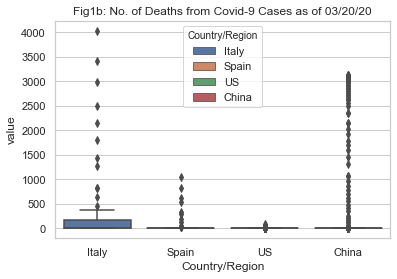

In [744]:
#Example2: Side-by-Side Boxplot comparision of confirmed cases in US,Italy, Spain & China
t1=dfdeath.loc[(dfdeath['Country/Region'] == 'US') | (dfdeath['Country/Region'] == 'Italy') | (dfdeath['Country/Region'] == 'China') | (dfdeath['Country/Region'] == 'Spain')]
t1
sns.set_style("whitegrid") 
sns.boxplot(x = 'Country/Region', y = 'value', hue='Country/Region' ,dodge=False, data = t1).set_title('Fig1b: No. of Deaths from Covid-9 Cases as of 03/20/20') ;

In [745]:
#Reading in actual recovered cases
df2 = pd.read_csv("https://raw.githubusercontent.com/ssufian/DAT-602/master/time_series_2019-ncov-Recovered.csv?token=AMUD77ZTTTCUYHWG3Y4UAIK6OZV2Q",index_col=False, na_filter= False) 
df2.head(8)
# shape from wide to long with melt function in pandas
dfrecovered= pd.melt(df2,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='value')
dfrecovered.head(10) #peeking

#summary statistics of dataset

df2.loc[:,['3/20/2020']].describe()

,3/20/2020
count,477.000000
mean,182.926625
std,2701.153605
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,58382.000000


In [735]:
#Total number of cases as of 3/20/2020
df2.loc[:,['3/20/2020']].sum()

3/20/2020    87256
dtype: int64

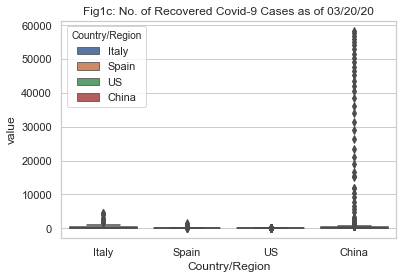

In [746]:
#Example3: Side-by-Side Boxplot comparision of confirmed cases in US,Italy, Spain & China
t2=dfrecovered.loc[(dfrecovered['Country/Region'] == 'US') | (dfrecovered['Country/Region'] == 'Italy') | (dfrecovered['Country/Region'] == 'China') | (dfrecovered['Country/Region'] == 'Spain')]
t2
sns.set_style("whitegrid") 
sns.boxplot(x = 'Country/Region', y = 'value', hue='Country/Region' ,dodge=False,data = t2).set_title('Fig1c: No. of Recovered Covid-9 Cases as of 03/20/20') ;

# Data Wrangling
Create a subset of your original data and perform the following.  

•	Use .rename() on multiple columns. Take note of inplace=True.

•	Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

•	Create a new column based on existing columns or calculations. For example, you have two columns: city and state.  You create a new column called location that consists of city and state. 

•	Drop column(s) from your dataset.

•	Sort your data based on multiple variables. 

•	Filter your data based on some condition. 

•	Apply multiple aggregation functions to your data (count, mean, min, max).  Use the .groupby() and .agg() or .apply() functions if needed.  

In [320]:
#Example4: convert Date column type from integer format to datetime format
a1=pd.to_datetime(dfconfirmed['Date'])
type(a1) #checking if integer is changed to datetime

#Creating new multiple columns
dfconfirmed = dfconfirmed.assign(New_Date = a1,  Case_Type = "Confirmed")
#renaming multiple columns 
dfconfirmed.rename(columns={'Lat': 'Latitude','Long': 'Longitude'}, inplace=True)

dfconfirmed.head()


,Province/State,Country/Region,Latitude,Longitude,Date,value,New_Date,Case_Type
0,,Thailand,15.0000,101.0000,1/22/2020,2,2020-01-22,Confirmed
1,,Japan,36.0000,138.0000,1/22/2020,2,2020-01-22,Confirmed
2,,Singapore,1.2833,103.8333,1/22/2020,0,2020-01-22,Confirmed
3,,Nepal,28.1667,84.2500,1/22/2020,0,2020-01-22,Confirmed
4,,Malaysia,2.5000,112.5000,1/22/2020,0,2020-01-22,Confirmed


In [311]:
#Example5: convert Date column type from integer format to datetime format
a2=pd.to_datetime(dfdeath['Date'])
type(a2) #checking if integer is changed to datetime

#Creating new multiple columns
dfdeath = dfdeath.assign(New_Date = a2,  Case_Type = "Death")

#renaming multiple columns 
dfdeath.rename(columns={'Lat': 'Latitude','Long': 'Longitude'}, inplace=True)

dfdeath.head()

,Province/State,Country/Region,Latitude,Longitude,Date,value,New_Date,Case_Type
0,,Thailand,15.0000,101.0000,1/22/2020,0,2020-01-22,Death
1,,Japan,36.0000,138.0000,1/22/2020,0,2020-01-22,Death
2,,Singapore,1.2833,103.8333,1/22/2020,0,2020-01-22,Death
3,,Nepal,28.1667,84.2500,1/22/2020,0,2020-01-22,Death
4,,Malaysia,2.5000,112.5000,1/22/2020,0,2020-01-22,Death


In [312]:
#Example6: convert Date column type from integer format to datetime format
a3=pd.to_datetime(dfrecovered['Date'])
type(a3) #checking if integer is changed to datetime

#Creating new multiple columns
dfrecovered = dfrecovered.assign(New_Date = a1,  Case_Type = "Recovered")

#renaming multiple columns 
dfrecovered.rename(columns={'Lat': 'Latitude','Long': 'Longitude'}, inplace=True)

dfrecovered.head()

,Province/State,Country/Region,Latitude,Longitude,Date,value,New_Date,Case_Type
0,,Thailand,15.0000,101.0000,1/22/2020,0,2020-01-22,Recovered
1,,Japan,36.0000,138.0000,1/22/2020,0,2020-01-22,Recovered
2,,Singapore,1.2833,103.8333,1/22/2020,0,2020-01-22,Recovered
3,,Nepal,28.1667,84.2500,1/22/2020,0,2020-01-22,Recovered
4,,Malaysia,2.5000,112.5000,1/22/2020,0,2020-01-22,Recovered


In [322]:
#Example7: Merge the 3 datasets into a merged dataset and continue with Data Wrangling exercises

# Stack the DataFrames on top of each other
vertical_stack = pd.concat([dfconfirmed, dfdeath,dfrecovered], axis=0)
len(vertical_stack) #check that len of merged dataframe is tripled => 84429

vertical_stack.head() #peeking merged dataset


,Province/State,Country/Region,Latitude,Longitude,Date,value,New_Date,Case_Type
0,,Thailand,15.0000,101.0000,1/22/2020,2,2020-01-22,Confirmed
1,,Japan,36.0000,138.0000,1/22/2020,2,2020-01-22,Confirmed
2,,Singapore,1.2833,103.8333,1/22/2020,0,2020-01-22,Confirmed
3,,Nepal,28.1667,84.2500,1/22/2020,0,2020-01-22,Confirmed
4,,Malaysia,2.5000,112.5000,1/22/2020,0,2020-01-22,Confirmed


In [267]:
#Example8: Sort merge data set by alphabetical order Country/Region

vertical_stack_sort=vertical_stack.sort_values(by=['Country/Region'])
vertical_stack_sort.head()

,Province/State,Country/Region,Latitude,Longitude,Date,value,New_Date,Case_Type
6704,,Afghanistan,33.0,65.0,2/5/2020,0,2020-02-05,Death
2888,,Afghanistan,33.0,65.0,1/28/2020,0,2020-01-28,Recovered
7181,,Afghanistan,33.0,65.0,2/6/2020,0,2020-02-06,Death
2888,,Afghanistan,33.0,65.0,1/28/2020,0,2020-01-28,Death
3842,,Afghanistan,33.0,65.0,1/30/2020,0,2020-01-30,Death


In [329]:
#Example9: Filter merge data set on US only
vertical_stack_sort_filtered_US = vertical_stack[vertical_stack['Country/Region']=='US']
vertical_stack_sort_filtered_US.head()



,Province/State,Country/Region,Latitude,Longitude,Date,value,New_Date,Case_Type
98,Washington,US,47.4009,-121.4905,1/22/2020,0,2020-01-22,Confirmed
99,New York,US,42.1657,-74.9481,1/22/2020,0,2020-01-22,Confirmed
100,California,US,36.1162,-119.6816,1/22/2020,0,2020-01-22,Confirmed
101,Massachusetts,US,42.2302,-71.5301,1/22/2020,0,2020-01-22,Confirmed
102,Diamond Princess,US,35.4437,139.6380,1/22/2020,0,2020-01-22,Confirmed


In [336]:
#Example10a: Mltiple aggregation functions(count, mean, min, max). Use the .groupby() and .agg() or .apply() functions
# Statistical Summary: On US only COVID-19 Confirmed Cases
vertical_stack_sort_filtered_US.groupby('Case_Type').get_group('Confirmed')['value'].describe() 


count    14573.000000
mean         4.597681
std         93.707766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       8310.000000
Name: value, dtype: float64

In [337]:
#Example10b: Mltiple aggregation functions(count, mean, min, max). Use the .groupby() and .agg() or .apply() functions
# Statistical Summary: On US only COVID-19 Recovered Cases
vertical_stack_sort_filtered_US.groupby('Case_Type').get_group('Recovered')['value'].describe() 

count    14573.000000
mean         0.017086
std          0.188312
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: value, dtype: float64

In [338]:
#Example10c: Mltiple aggregation functions(count, mean, min, max). Use the .groupby() and .agg() or .apply() functions
# Statistical Summary: On US only COVID-19 Death Cases
vertical_stack_sort_filtered_US.groupby('Case_Type').get_group('Death')['value'].describe() 

count    14573.000000
mean         0.077884
std          1.545108
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         83.000000
Name: value, dtype: float64

## Data Visualization
Use pandas to create a data visualization of your choosing on your dataset.



In [524]:
#Plot of Global spread of Covid-19 of China vs. the rest of World:  Confirmed Cases Only

vertical_stack.rename(columns={'Country/Region': 'Country_Region'}, inplace=True) # renaming column label 
countries = ['China']
vertical_stack_China = vertical_stack[vertical_stack.Country_Region.isin(countries)]
vertical_stack_China.head()
#confirmed cases in China only
China_Confirmed=vertical_stack_China[ (vertical_stack_China.Case_Type =="Confirmed")]

#confirmed cases all countries except China
The_world=vertical_stack[~vertical_stack.Country_Region.isin(countries)]
The_world_Confirmed=The_world[(The_world.Case_Type =="Confirmed")]
The_world_Confirmed=The_world_Confirmed.assign(The_World = "The Rest of World")

The_world_Confirmed.head()

,Province/State,Country_Region,Latitude,Longitude,Date,value,New_Date,Case_Type,The_World
0,,Thailand,15.0000,101.0000,1/22/2020,2,2020-01-22,Confirmed,The Rest of World
1,,Japan,36.0000,138.0000,1/22/2020,2,2020-01-22,Confirmed,The Rest of World
2,,Singapore,1.2833,103.8333,1/22/2020,0,2020-01-22,Confirmed,The Rest of World
3,,Nepal,28.1667,84.2500,1/22/2020,0,2020-01-22,Confirmed,The Rest of World
4,,Malaysia,2.5000,112.5000,1/22/2020,0,2020-01-22,Confirmed,The Rest of World


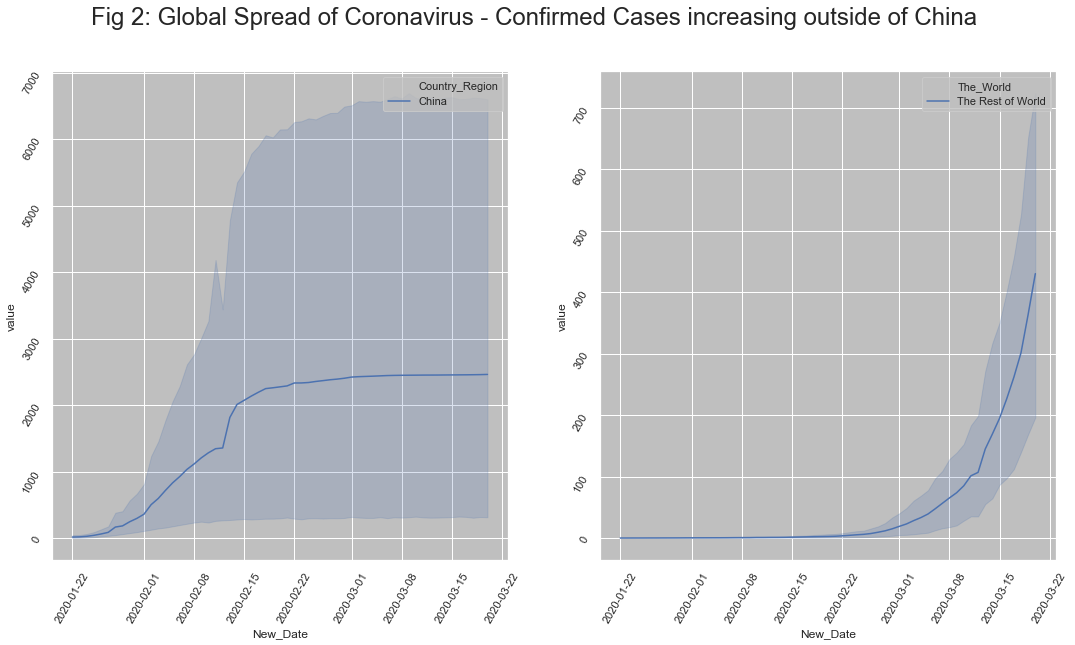

In [762]:
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#create subplot figure with having two side by side plots
fig, axs = plt.subplots(ncols=2,figsize=(18,9))
# plot first pandas frame in subplot style
sns.lineplot(x='New_Date', y='value',hue="Country_Region",data=China_Confirmed, ax=axs[0]);
# plot second pandas frame in subplot style
sns.lineplot(x='New_Date', y='value', hue='The_World',data=The_world_Confirmed, ax=axs[1]);

fig.suptitle("Fig 2: Global Spread of Coronavirus - Confirmed Cases increasing outside of China ", fontsize=24);

# Rotate x-labels
axs[1].tick_params(rotation=60);
axs[0].tick_params(rotation=60);

In [748]:
USconfirmed=vertical_stack_sort_filtered_US.groupby(['Country/Region']).get_group('US')
US=USconfirmed.groupby(['Case_Type']).get_group('Confirmed')
#Going back to wide format again to plot barcharts for US Confirmed cases only
US2=df.loc[:,['Province/State','Country/Region','3/20/2020']]
US2

US2=US2.groupby('Country/Region').get_group('US')
US2= US2.rename(columns = {'Province/State':'State','Country/Region':'Country','3/20/2020':'Confirmed_Cases'})
US2=US2.loc[(US2['Confirmed_Cases'] >0) ]
US2.head()

,State,Country,Confirmed_Cases
98,Washington,US,1524
99,New York,US,8310
100,California,US,1177
101,Massachusetts,US,413
102,Diamond Princess,US,49


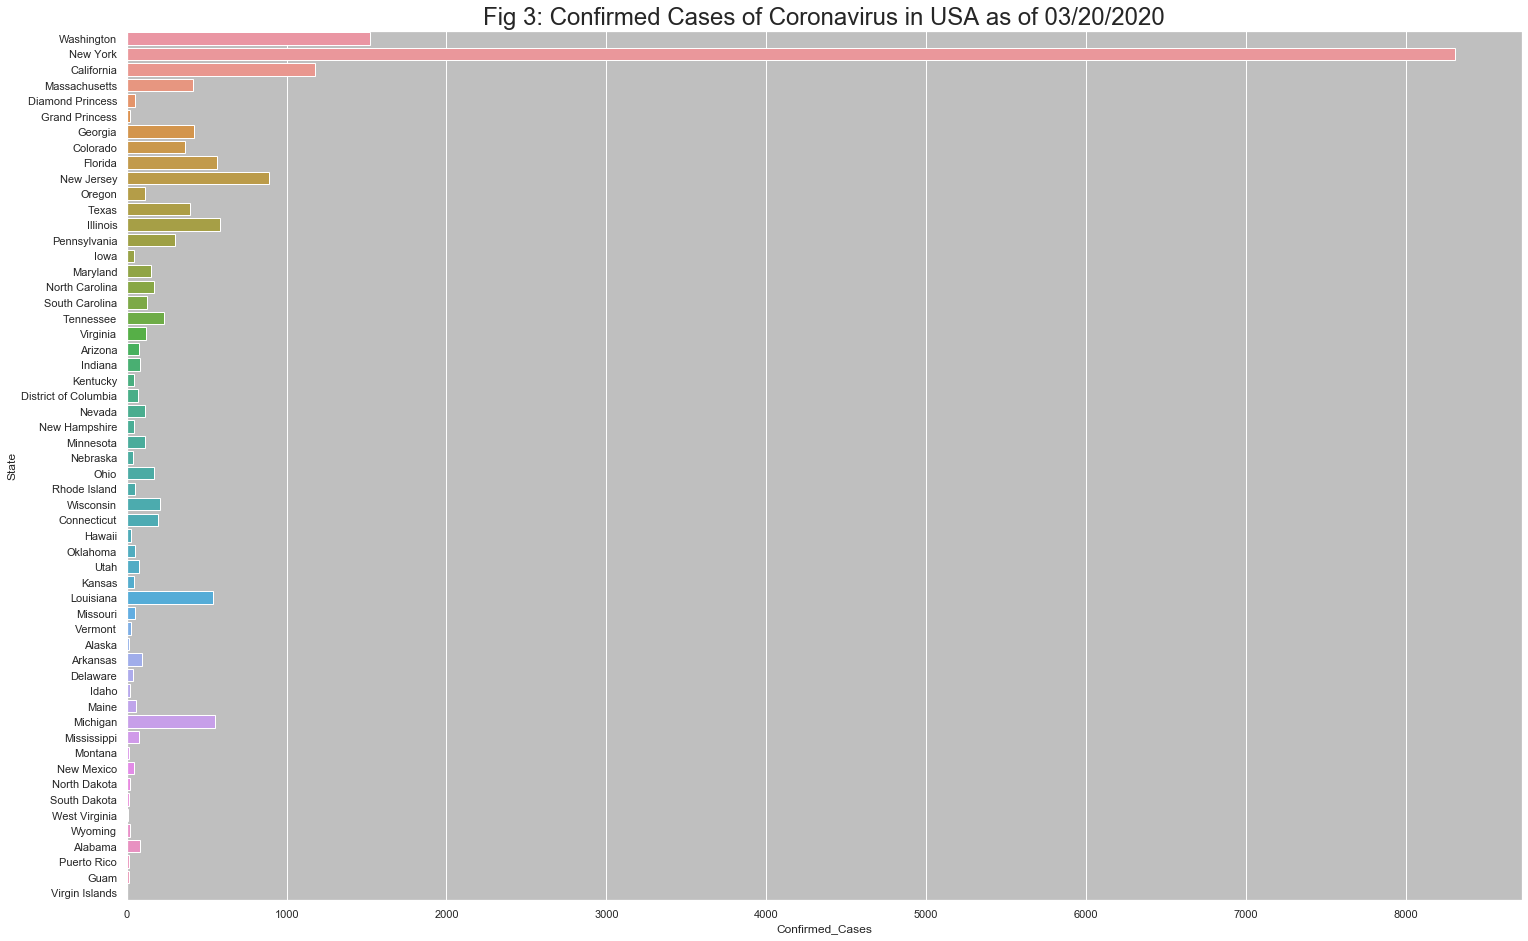

In [759]:

sns.set_style("darkgrid", {"axes.facecolor": ".75"})

ax = sns.barplot(x="Confirmed_Cases", y="State",data=US2).set_title("Fig 3: Confirmed Cases of Coronavirus in USA as of 03/20/2020", fontsize=24)
plt.rcParams['figure.figsize']=(25,16);

# Rotate x-labels
plt.xticks(rotation=0);

In [760]:
#Map of Covid-19 hotspots inside USA

fig = px.choropleth(locations=["CA", "WA", "NY","MA","GA","FL","NJ","IL","LA","MI","CO","TX","PA"], locationmode="USA-states",color=[1,2,3,4,5,6,7,8,9,10,11,12,13] ,scope="usa")
fig.update_layout(
    title_text = 'Fig 4: US States reporting over 300 Covid-19 confirmed cases as of 03/20/2020',
    geo_scope='usa', # limited map scope to USA
)

fig.show()

# Conclusions 
Provide some conclusions or insight gained from looking at your data.


In [0]:
''' 
General Observations & Summary Statistics of the 
Novel Coronavirus (COVID-19) Cases as of March 20, 2020

The 2 most glaring statitics that stood out were:
(1) Italy surpassing China in terms of Coronavirus-related deaths (Fig 1b)
(2) Global Spread continues to increase while China is flat-lining (Fig 2)

From Fig 3 - In The United States, the top 5 "Epicenters" of the disease are (in descending order):
(1) New York
(2) Washington
(3) California
(4) New Jersey
(5) Massachusetts
In the US only:
Confirmed Cases = 8,310
Recovered Cases = 6
Death Cases = 83

Top 4 affected countries, Confirmed Cases (in descending order):
(1) China
(2) Italy
(3) Spain
(4) USA
Total Confirmed Cases (worldwide) = 272,166

Top 4 affected countries, Recovered Cases (in descending order):
(1) China
(2) Italy
(3) Spain
(4) USA
Total recovery Cases (worldwide)= 87,256

Top 4 affected countries, Death Cases (in descending order):
(1) Italy
(2) China
(3) Spain
(4) USA
Total death Cases (worldwide) = 11,299

Summary:
As this disease evolves and the world is trying to understand it's root causes, there are no discernable trends with so 
little historical data.  The overall numbers of cases (new cases, deaths and recovered cases) are still growing as of this 
writing (03/22/2020).  
One thing has become clear, China (the source of the pandemic) is no longer the epicenter of the disease; it has moved
on to other parts of the world; in the Europe with Italy, Spain followed by Germany.  Across the Atlantic, the United States
has now the biggest number of confirmed cases.  Lastly In the Middle-East, Iran holds the largest number of confirmed and
death cases respectively.


In [0]:
'''          
References:

1) https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

2) https://www.cnbc.com/2020/03/16/coronavirus-live-updates-us-retail-closures-could-explode-irans-deaths-surge.html

'''